In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [2]:
df = pd.read_csv('mirai3.csv', header=None)
labels = [1] * 71000 + [-1] * 29000
df['label'] = labels

X = df.drop('label', axis = 1)
y = df['label']

df

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,label
0,1.89742,68.1526,46.927100,2.30082,68.6038,46.126200,4.74452,71.1236,38.470500,36.0737,...,-9.074680e-29,-2.880320e-17,143.15200,74.0,0.000003,104.652,6.621220e-12,2.175260e-27,6.392140e-16,1
1,1.75007,69.4285,118.530000,3.06442,74.7885,106.647000,11.08620,78.8105,59.996500,110.2570,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,1
2,2.74967,65.9995,95.995400,4.06400,71.1496,120.978000,12.08570,77.2540,81.886900,111.2570,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,1
3,1.20593,89.8507,80.829300,1.81715,95.6911,137.610000,6.57048,100.4730,159.338000,78.1247,...,0.000000e+00,0.000000e+00,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000e+00,0.000000e+00,1
4,1.02825,86.0000,0.000003,1.13366,86.0004,0.000808,2.07755,86.0922,0.175812,12.4676,...,0.000000e+00,0.000000e+00,4.93732,86.0,0.000002,86.000,2.728480e-12,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.00603,60.1305,2.854850,1.11986,62.2229,43.963200,5.61876,73.8553,112.847000,107.6470,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,-1
99996,2.00582,60.0655,1.435830,2.11972,61.1742,24.454500,6.61853,71.7619,120.420000,108.6470,...,0.000000e+00,0.000000e+00,1.00000,60.0,0.000000,60.000,0.000000e+00,0.000000e+00,0.000000e+00,-1
99997,1.40708,92.7404,133.860000,1.90395,95.1054,213.901000,6.04193,95.6510,415.480000,72.9923,...,0.000000e+00,0.000000e+00,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000e+00,0.000000e+00,-1
99998,2.40571,89.9386,89.252800,2.90284,91.9687,158.937000,7.04075,94.2802,367.820000,73.9909,...,0.000000e+00,0.000000e+00,1.00000,86.0,0.000000,86.000,0.000000e+00,0.000000e+00,0.000000e+00,-1


lets run a cross-val of lightgbm

In [5]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

cv = StratifiedKFold()

def cross_val(X, y, model, cv):
    res = cross_validate(model, 
               X=X, 
               y=y, 
               cv=cv,
               scoring=('accuracy', 'f1_weighted', 'precision', 'recall'),
               )
    
    display(res)
    print("\n")
    for metric in ['test_accuracy', 'test_f1_weighted', 'test_precision', 'test_recall']:
        print(metric, res[metric].mean())

cross_val(X,y,model,cv)

[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.197335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29080
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.186065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29049
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [

{'fit_time': array([11.33161092, 10.5717721 , 11.0818758 , 11.84552073,  9.46347928]),
 'score_time': array([0.24021244, 0.21024847, 0.21746564, 0.23428917, 0.20072103]),
 'test_accuracy': array([0.9123 , 0.99505, 1.     , 0.99865, 0.43185]),
 'test_f1_weighted': array([0.90717024, 0.99506155, 1.        , 0.9986499 , 0.38295483]),
 'test_precision': array([0.89089196, 0.99978734, 1.        , 0.99894389, 1.        ]),
 'test_recall': array([0.99880282, 0.99323944, 1.        , 0.99915493, 0.19978873])}



test_accuracy 0.8675700000000001
test_f1_weighted 0.8567673059016979
test_precision 0.9779246369024645
test_recall 0.8381971830985915


last_split isnt doing so well, lets see its indexes

In [6]:
validation_index = []
for fold, (train_index, val_index) in enumerate(cv.split(X, y)):
    if fold == 4:
        validation_index = val_index
validation_index


array([56800, 56801, 56802, ..., 99997, 99998, 99999])

<Axes: ylabel='Density'>

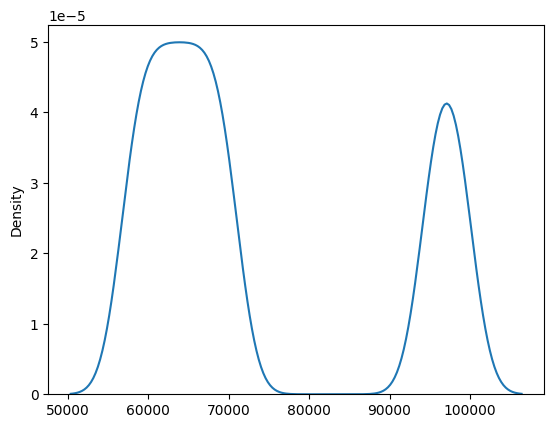

In [7]:
sns.kdeplot(validation_index)

In [8]:
preds = []
trues = []
for fold, (train_index, val_index) in enumerate(cv.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    if fold == 4:  
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        trues = y_val
        res = pd.concat([y_val, pd.Series(preds, index=y_val.index, name='preds')], axis=1)
    
    

mispredicted = res[res['label'] != res['preds']].index
mispredicted


[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.179077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29068
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 115
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384


Int64Index([57216, 57218, 57219, 57220, 57230, 57231, 57232, 57233, 57234,
            57241,
            ...
            70990, 70991, 70992, 70993, 70994, 70995, 70996, 70997, 70998,
            70999],
           dtype='int64', length=11363)

<Axes: ylabel='Density'>

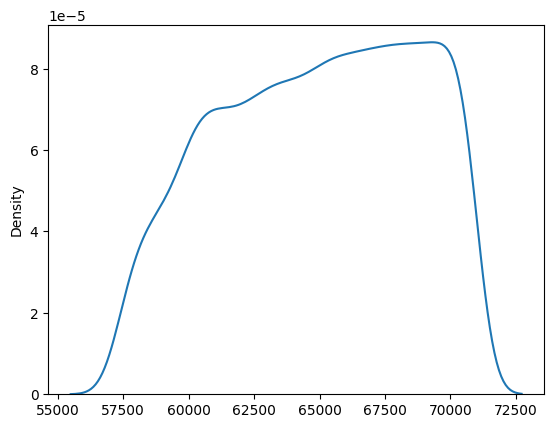

In [9]:
sns.kdeplot(mispredicted)

we see that the samples of the transition are being mispredicted, how can we fix this?

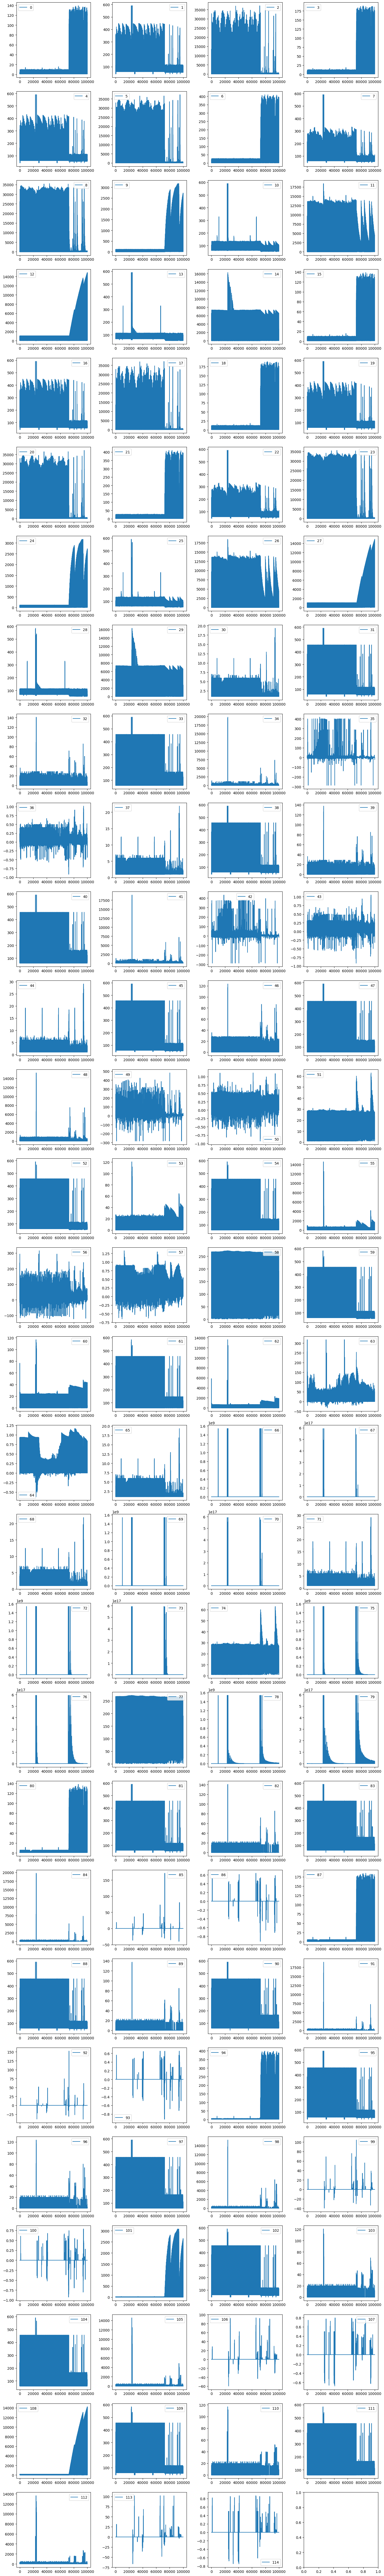

In [6]:
fig, ax = plt.subplots(29, 4, figsize=(15, 100))
ax_flat = ax.flatten()  

for i, col in enumerate(X.columns):
    
    df[col].plot(ax=ax_flat[i])
    ax_flat[i].legend()

plt.tight_layout()
plt.show()

distinct the useless

In [14]:
useless = [13, 14, 25, 28, 29, 32, 34, 35, 36, 39, 41, 42, 43, 44, 46, 48, 49, 50, 57, 58, 63, 64, 66, 67,
69, 70, 72, 73, 75, 76, 78, 79, 82, 84, 85, 86, 91, 92, 93, 99, 100, 106, 107,113,114]

len(useless)

useful = [feat for feat in X.columns if feat not in useless]


In [12]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

cv = StratifiedKFold()

def cross_val(X, y, model, cv):
    res = cross_validate(model, 
               X=X, 
               y=y, 
               cv=cv,
               scoring=('accuracy', 'f1_weighted', 'precision', 'recall'),
               )
    
    display(res)
    print("\n")
    for metric in ['test_accuracy', 'test_f1_weighted', 'test_precision', 'test_recall']:
        print(metric, res[metric].mean())



In [15]:
cross_val(X[useful],y,model,cv)

[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17605
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [Info] Number of positive: 56800, number of negative: 23200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17574
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 70
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710000 -> initscore=0.895384
[LightGBM] [Info] Start training from score 0.895384
[LightGBM] [In

{'fit_time': array([11.06873631,  7.28733039,  7.64035892,  7.18738627,  7.26817536]),
 'score_time': array([0.26610756, 0.25475407, 0.2554462 , 0.25934458, 0.24492025]),
 'test_accuracy': array([0.8639 , 0.924  , 0.98825, 0.96625, 0.9561 ]),
 'test_f1_weighted': array([0.8518839 , 0.92513238, 0.98818577, 0.96601149, 0.95637634]),
 'test_precision': array([0.84697703, 0.96803484, 0.98466023, 0.96750778, 0.97776503]),
 'test_recall': array([0.9865493 , 0.9234507 , 0.99901408, 0.98556338, 0.96      ])}



test_accuracy 0.9397
test_f1_weighted 0.9375179752370671
test_precision 0.9489889816335699
test_recall 0.9709154929577466


woow removing some of the features improves the score significantly!

lets try changing some of the useless ones to make the model better understand the transition

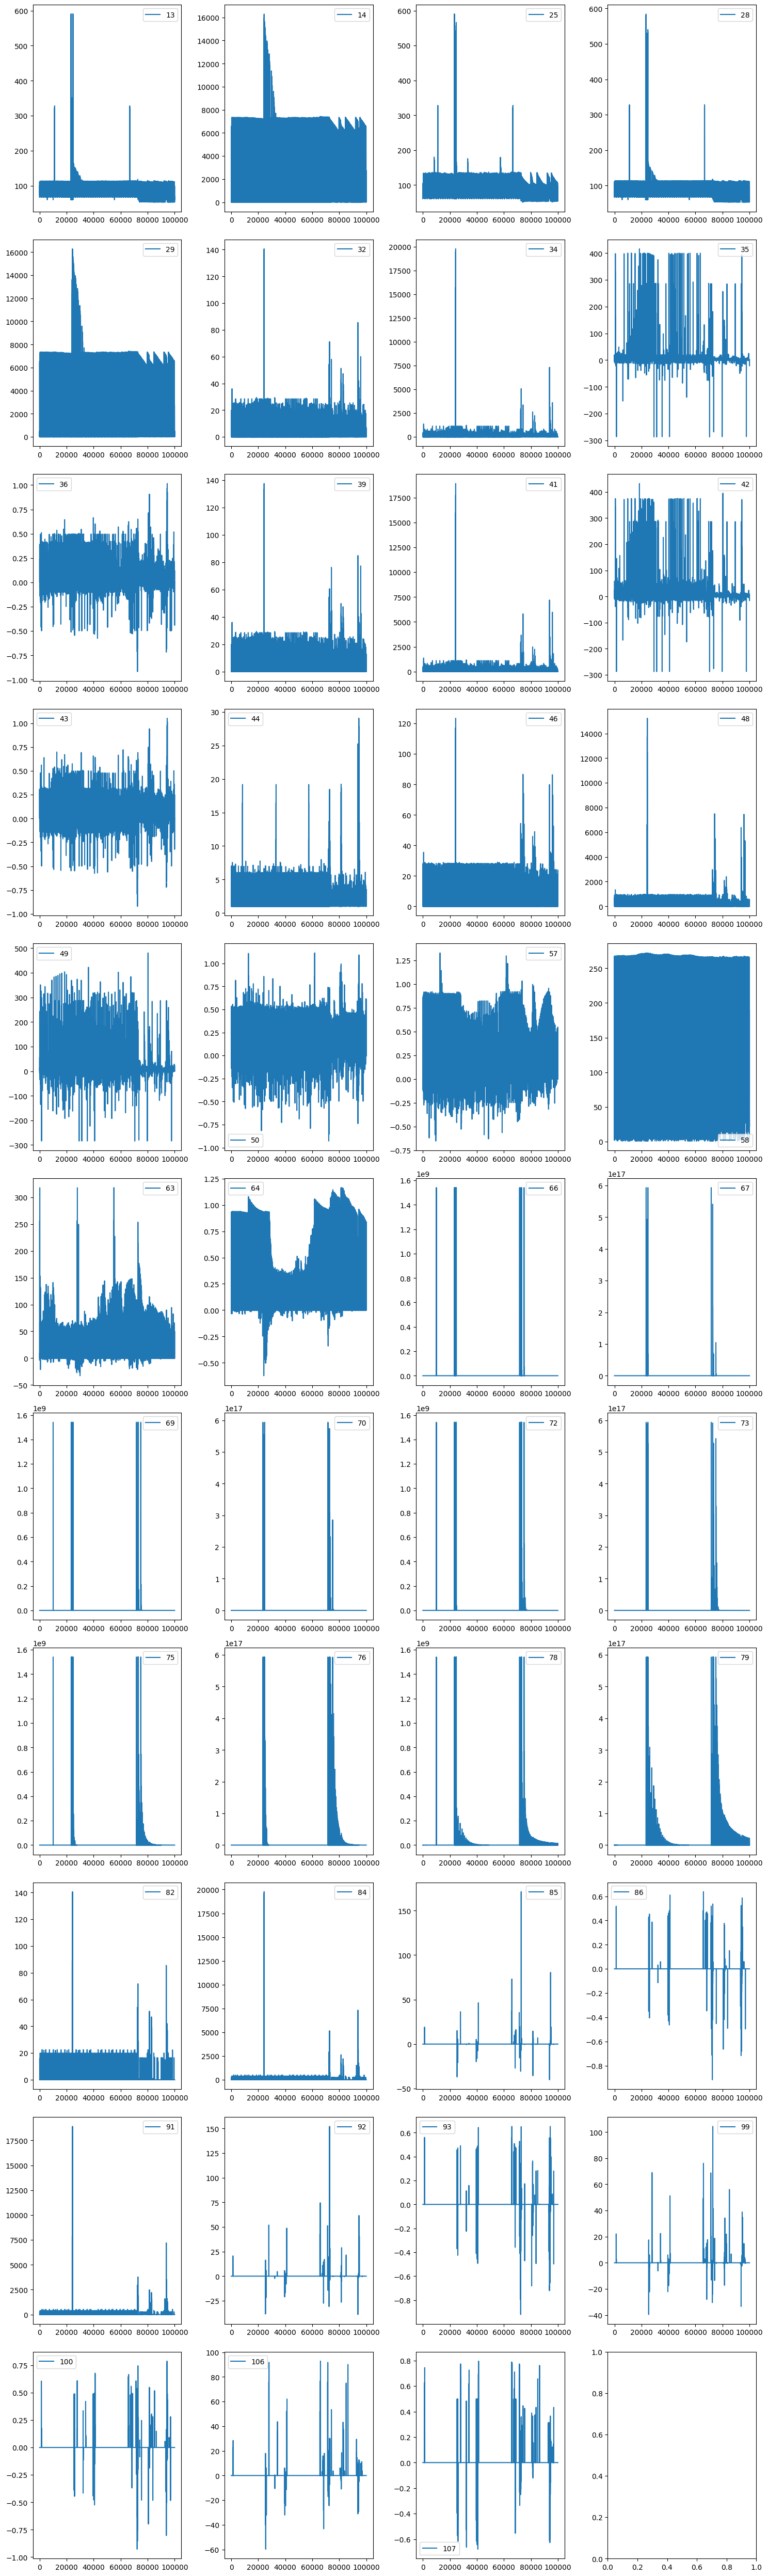

In [6]:
fig, ax = plt.subplots(11, 4, figsize=(15, 50))
for i, col in enumerate(useless):
    ax_ = ax[i//4][i%4]
    df[col].plot(ax=ax_)
    ax_.legend()

plt.tight_layout()
plt.show()

<Axes: >

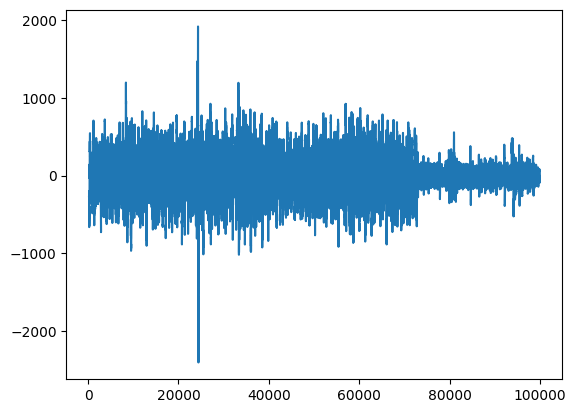

In [23]:
df[14].rolling(window=100).mean().diff(periods=100).plot()

if we are to incorporate these features we need new cv. custom. sklearns will lead to data leakage..

In [18]:
def my_train_test_split(X, y, K, gap=0, plot=False):
    iter = 0

    benign_splits = np.linspace(0,71000,K+2,dtype=int)
    malicious_splits = np.linspace(71000,100000,K+2,dtype=int)

    while iter < K:
        
        X_train_benign = X.iloc[benign_splits[0]:benign_splits[iter+1]-gap]
        X_train_malicious = X.iloc[malicious_splits[0]:malicious_splits[iter+1]-gap]

        X_test_benign = X.iloc[benign_splits[iter+1]:benign_splits[iter+2]]
        X_test_malicious = X.iloc[malicious_splits[iter+1]:malicious_splits[iter+2]]
       

        y_train_benign = y.iloc[benign_splits[0]:benign_splits[iter+1]-gap]
        y_train_malicious = y.iloc[malicious_splits[0]:malicious_splits[iter+1]-gap]

        y_test_benign = y.iloc[benign_splits[iter+1]:benign_splits[iter+2]]
        y_test_malicious = y.iloc[malicious_splits[iter+1]:malicious_splits[iter+2]]
        
        if plot:
            if iter == 0:
                plt.figure(figsize=(15, 4))
            offset_step = 0.15
            
           
            y_train_benign_offset = y_train_benign - (iter * offset_step)
            y_train_malicious_offset = y_train_malicious - (iter * offset_step)
            y_test_benign_offset = y_test_benign - (iter * offset_step)
            y_test_malicious_offset = y_test_malicious - (iter * offset_step)
            
            
            colors = ['black', 'red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'gray', 'brown', 'orange', 'purple']

            plt.scatter(y_train_benign.index, y_train_benign_offset, label=f'train{iter+1}', marker='s', c=colors[iter+1]  )
            plt.scatter(y_test_benign.index, y_test_benign_offset, marker ='x', c=colors[-iter-1])
            plt.scatter(y_train_malicious.index, y_train_malicious_offset, marker='s', c=colors[iter+1])
            plt.scatter(y_test_malicious.index, y_test_malicious_offset, label=f'test{iter+1}', marker ='x', c=colors[-iter-1])
            if iter == K-1:
                plt.yticks([-1, 1])   
                plt.xlim(0,100100)

                plt.legend()
                plt.show()   

        X_train = pd.concat([X_train_benign, X_train_malicious],axis=0)
        X_test = pd.concat([X_test_benign, X_test_malicious],axis=0)
        y_train = pd.concat([y_train_benign, y_train_malicious],axis=0)
        y_test = pd.concat([y_test_benign, y_test_malicious],axis=0)

        iter += 1

        yield X_train, X_test, y_train, y_test
from lightgbm import LGBMClassifier

def my_cross_val(X, y, K, gap=0, plot=False):

    f1s = []
    for iter, (X_train, X_test, y_train, y_test) in enumerate(my_train_test_split(X, y, K=5)):

        model = LGBMClassifier(verbose= -1)


        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test,y_pred)
        print(f"split {iter + 1 } score: {f1}")
        f1s.append(f1)


    print("mean f1 score", np.mean(f1s))




lets run the original dataset on these splits...

In [19]:
my_cross_val(X,y,K=5,gap=0)

split 1 score: 0.5975949292103548
split 2 score: 0.5273959823372101
split 3 score: 0.5547347212894559
split 4 score: 0.4721218378936499
split 5 score: 0.41851456051295743
mean f1 score 0.5140724062487256


lets run the dataset dropping the useless features

In [20]:
my_cross_val(X[useful],y,K=5,gap=0)

split 1 score: 0.8517298973991887
split 2 score: 0.9782293178519594
split 3 score: 0.98248427805681
split 4 score: 0.9671459622136767
split 5 score: 0.967996567996568
mean f1 score 0.9495172047036405


In [23]:
X_aggr = X.copy()
X_aggr['14_aggr'] = X_aggr[14].rolling(window=100).mean().diff(periods=100).fillna(0)
X_aggr['25_aggr'] = X_aggr[25].rolling(window=100).std().diff(periods=100).fillna(0)
X_aggr['64_aggr'] = X_aggr[64].rolling(window = 100).std().diff()

X_aggr['57_aggr'] = X_aggr[57].rolling(window = 100).std().diff()
X_aggr['79_aggr'] = X_aggr[79].pct_change()

useful_aggr = [feat for feat in X_aggr.columns if feat not in useless]



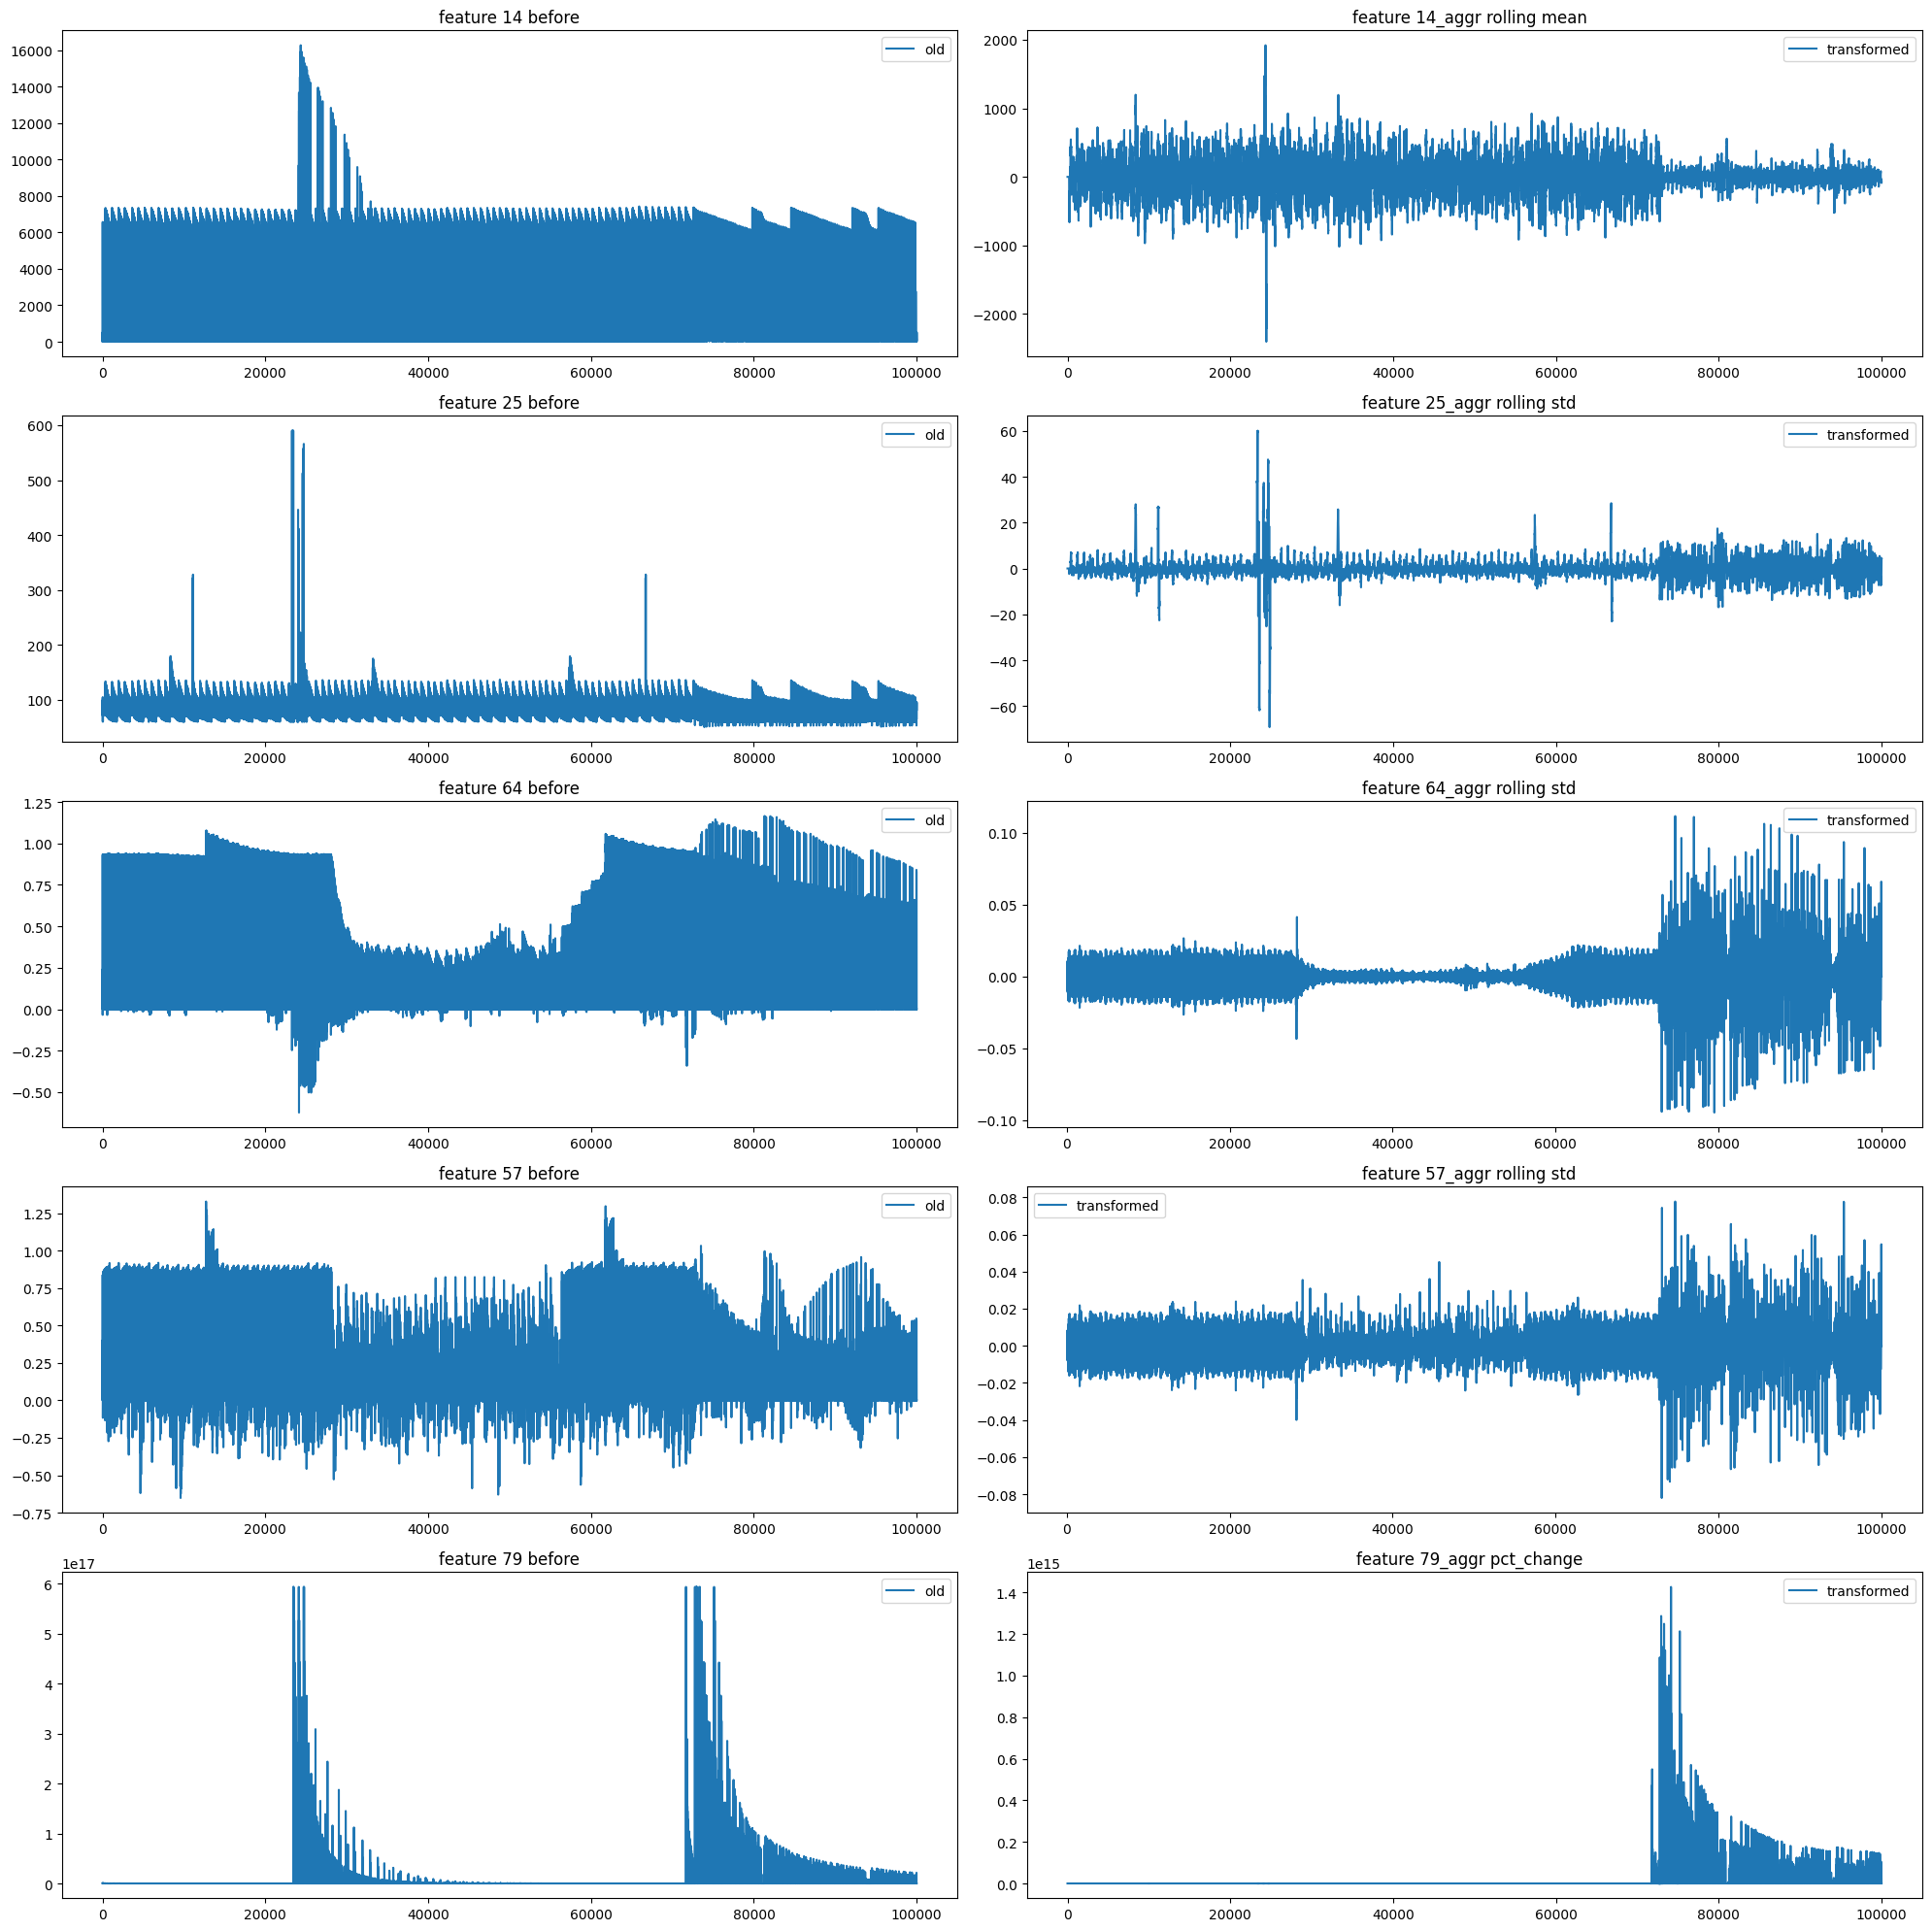

In [33]:
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
ax_flat = ax.flatten()  

trans_list = ['rolling mean', 'rolling std', 'rolling std', 'rolling std', 'pct_change']
aggr_columns = [14,'14_aggr',25,'25_aggr',64,'64_aggr',57,'57_aggr',79,'79_aggr']
for i, col in enumerate(aggr_columns):
    if i%2 == 0:
        X_aggr[col].plot(ax=ax_flat[i],label='old')
        ax_flat[i].legend()
        ax_flat[i].set_title(f"feature {col} before")
    else: 
        X_aggr[col].plot(ax=ax_flat[i],label='transformed')
        ax_flat[i].legend()
        ax_flat[i].set_title(f"feature {col} {trans_list[i//2]}  ")
plt.tight_layout()
plt.show()



lets run the new aggregated dataset with the rolling features

In [24]:
my_cross_val(X_aggr[useful_aggr],y,K=5,gap=200)

split 1 score: 0.8830926874708896
split 2 score: 0.9741719077568135
split 3 score: 0.9905245346869712
split 4 score: 0.9755199397413901
split 5 score: 0.9753745479593594
mean f1 score 0.9597367235230847
